In [1]:
cd ../..

/home/ben/masterphase/Mastercode


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (16, 8)

from Ising.Data import IsingData
from helper.helper import nn_partial_view, nn_fully_randomized, reshape_data

In [3]:
#data = IsingData("Ising/16x16_240temp_1000each/")
data = IsingData("Ising/alps_thermal_small/")

Loading data from precreated .npz


In [4]:
views = np.zeros((30,256), dtype=np.bool)
for i in range(30):
    tmp = np.concatenate((np.zeros((128)), np.ones(128)))
    np.random.shuffle(tmp)
    views[i,:] = tmp == 1
    
views = np.rollaxis(np.dstack((views, views)), 2, 0)

In [6]:
nn_partial_view(data, data_dir="data/partial_view_alps/site_randomization", views=views)

Tue Mar 20 12:14:04 2018 Training view 1/30 (128 spins), iteration 1/4
After 40.012s of training (epoch 40/40)
Training 40 epochs took 40.012s
Accuracy is 0.9599999785423279
Tue Mar 20 12:14:44 2018 Training view 1/30 (128 spins), iteration 2/4
Training 40 epochs took 38.285s
Accuracy is 0.9599999785423279
Tue Mar 20 12:15:22 2018 Training view 1/30 (128 spins), iteration 3/4
After 40.066s of training (epoch 39/40)
Accuracy is 0.9599999785423279
Training 40 epochs took 41.287s
Accuracy is 0.9599999785423279
Tue Mar 20 12:16:04 2018 Training view 1/30 (128 spins), iteration 4/4
After 40.157s of training (epoch 38/40)
Accuracy is 0.9599999785423279
Training 40 epochs took 42.144s
Accuracy is 0.9599999785423279
Tue Mar 20 12:16:46 2018 Training view 2/30 (128 spins), iteration 1/4
After 40.652s of training (epoch 40/40)
Training 40 epochs took 40.652s
Accuracy is 0.9599999785423279
Tue Mar 20 12:17:27 2018 Training view 2/30 (128 spins), iteration 2/4
After 41.007s of training (epoch 39/4

KeyboardInterrupt: 

## Test battery for partial view at different system sizes

In [7]:
#feature_numbers = [5, 10, 15, 20, 30, 50, 100, 150, 256]
feature_numbers = [10, 50, 150, 256]

In [8]:
import os
# generate random views
for n_features in feature_numbers:
    views = np.zeros((1,256), dtype=np.bool)
    for i in range(1):
        tmp = np.concatenate((np.zeros((256-n_features)), np.ones(n_features)))
        np.random.shuffle(tmp)
        views[i,:] = tmp == 1

    views = np.rollaxis(np.dstack((views, views)), 2, 0)
    
    directory = "data/partial_view_alps/site_randomization/{}_same".format(n_features)
    os.mkdir(directory)
    np.save(os.path.join(directory, "views.npy"), views)

In [20]:
#np.save('data/partial_view/same/256_same/views.npy', np.ones((2,1,256))==1)

In [11]:
for n_features in [10, 50, 150, 256]:
    directory = "data/partial_view_alps/site_randomization/{}_same".format(n_features)
    nn_partial_view(data, data_dir=directory, n_epochs=40, n_rep=2)

Tue Mar 20 12:40:02 2018 Training view 1/1 (10 spins), iteration 1/2
Training 40 epochs took 34.289s
Accuracy is 0.8999999761581421
Tue Mar 20 12:40:37 2018 Training view 1/1 (10 spins), iteration 2/2
Training 40 epochs took 33.223s
Accuracy is 0.8999999761581421
Tue Mar 20 12:41:10 2018 Training view 1/1 (50 spins), iteration 1/2
Training 40 epochs took 37.722s
Accuracy is 0.949999988079071
Tue Mar 20 12:41:48 2018 Training view 1/1 (50 spins), iteration 2/2
Training 40 epochs took 38.152s
Accuracy is 0.949999988079071
Tue Mar 20 12:42:27 2018 Training view 1/1 (150 spins), iteration 1/2
Training 40 epochs took 37.913s
Accuracy is 0.9599999785423279
Tue Mar 20 12:43:05 2018 Training view 1/1 (150 spins), iteration 2/2
Training 40 epochs took 36.394s
Accuracy is 0.9599999785423279
Tue Mar 20 12:43:42 2018 Training view 1/1 (256 spins), iteration 1/2
Training 40 epochs took 39.276s
Accuracy is 0.9599999785423279
Tue Mar 20 12:44:22 2018 Training view 1/1 (256 spins), iteration 2/2
After

## Test Battery for fully randomized spin training
each training point will be randomly selected from any spin at a given temperature

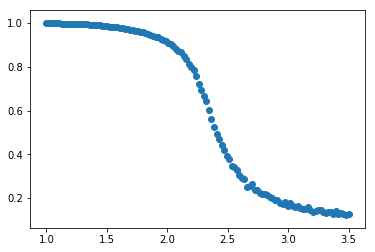

In [27]:
mags = [np.mean(np.abs(np.mean(data.configs[data.temps == t, :], axis=1))) for t in data.u_temps]
plt.scatter(data.u_temps, mags)

In [35]:
sum(data.temps>2.269)

59000

In [39]:
for n_spins in [50, 256]:
    dtr, dt = reshape_data(data, n_spins)
    print(np.shape(dtr[0]))
    mags = [np.mean(np.abs(np.mean(dtr[0][dtr[2] == t, :], axis=1))) for t in np.unique(dtr[2])]
    plt.scatter(np.unique(dtr[2]), mags)
    
    #nn_fully_randomized(dtr, dt, data_dir='data/partial_view_alps/full_randomization/', n_rep=1)

(614400, 50)
(120000, 256)
